In [0]:
from tensorflow.python.client import device_lib

for x in device_lib.list_local_devices():
  if x.device_type == "GPU":
    print("***** GPU Information *****")
    print("Device Name: " , x.name)
    print("Memory Limit: " , "%.2f" % float(x.memory_limit/(1000*1000*1000)), "GB")
    print("Description: " , x.physical_device_desc)

***** GPU Information *****
Device Name:  /device:GPU:0
Memory Limit:  14.91 GB
Description:  device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from google.colab import drive

drive.mount('/content/gdrive')

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# main training dataset directory
DATADIR = '/content/gdrive/My Drive/animals/train/'

# list of supported animals; each has its own file in the dataset
CATEGORIES = ["antelope", "bat", "beaver", "bobcat", "buffalo", "chihuahua",
              "chimpanzee", "collie", "dalmatian", "german+shepherd",
              "grizzly+bear", "hippopotamus", "horse", "killer+whale", "mole",
              "moose", "mouse", "otter", "ox", "persian+cat", "raccoon", "rat",
              "rhinoceros", "seal", "siamese+cat", "spider+monkey", "squirrel",
              "walrus", "weasel", "wolf"]

# resize the images for consistency
IMG_SIZE = 150

# gather the images for training
train_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      train_data.append([new_array, class_num])
    print("finished with dir#", class_num)

finished with dir# 0
finished with dir# 1
finished with dir# 2
finished with dir# 3
finished with dir# 4
finished with dir# 5
finished with dir# 6
finished with dir# 7
finished with dir# 8
finished with dir# 9
finished with dir# 10
finished with dir# 11
finished with dir# 12
finished with dir# 13
finished with dir# 14
finished with dir# 15
finished with dir# 16
finished with dir# 17
finished with dir# 18
finished with dir# 19
finished with dir# 20
finished with dir# 21
finished with dir# 22
finished with dir# 23
finished with dir# 24
finished with dir# 25
finished with dir# 26
finished with dir# 27
finished with dir# 28
finished with dir# 29


In [0]:
random.shuffle(train_data)

train_images = []
train_labels = []

for features, label in train_data:
  train_images.append(features)
  train_labels.append(label)

train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
train_images = train_images / 255.0

train_labels = to_categorical(train_labels)

In [0]:
def create_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=train_images.shape[1:]))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(30, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy', #sparse_categorical_crossentropy?
        metrics=['accuracy']
    )

    return model

In [0]:
model = create_model()

epochs = 30 #100

history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_split=0.2
)

Train on 10410 samples, validate on 2603 samples
Epoch 1/30
10410/10410 [==============================] - 26s 3ms/step - loss: 3.5090 - acc: 0.0838 - val_loss: 3.3408 - val_acc: 0.0891
Epoch 2/30
10410/10410 [==============================] - 21s 2ms/step - loss: 3.1928 - acc: 0.1044 - val_loss: 3.3425 - val_acc: 0.0526
Epoch 3/30
10410/10410 [==============================] - 21s 2ms/step - loss: 3.0658 - acc: 0.1432 - val_loss: 3.0817 - val_acc: 0.1587
Epoch 4/30
10410/10410 [==============================] - 21s 2ms/step - loss: 2.8911 - acc: 0.1838 - val_loss: 2.8317 - val_acc: 0.2109
Epoch 5/30
10410/10410 [==============================] - 21s 2ms/step - loss: 2.7600 - acc: 0.2173 - val_loss: 2.7700 - val_acc: 0.2297
Epoch 6/30
10410/10410 [==============================] - 21s 2ms/step - loss: 2.6171 - acc: 0.2552 - val_loss: 2.6466 - val_acc: 0.2512
Epoch 7/30
10410/10410 [==============================] - 21s 2ms/step - loss: 2.5088 - acc: 0.2774 - val_loss: 2.6427 - val_acc:

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

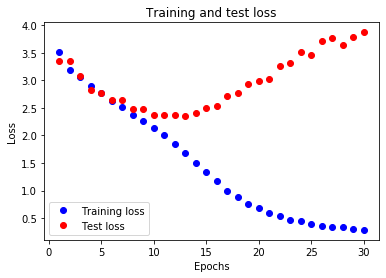

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

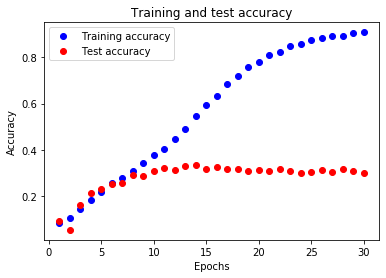

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#model.save('narwhal') <- if you want to

#DATADIR = '/content/gdrive/My Drive/animals/test/'

#IMG_SIZE = 100
#test_data = []

#for img in os.listdir(DATADIR):
#   img_array = cv2.imread(os.path.join(DATADIR,img))
#   new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#   test_data.append([new_array, class_num])

#predictions = model.predict([test_data]) <- for running predictions on test data
#print(np.argmax(predictions[0]))
#plt.imshow(test_data[0])
#plt.show()

# just run a loop on the first 20 images and check manually if they're correct
#test_data = np.array(test_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#test_data = test_data / 255.0